In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
tree_inv = pd.read_csv('Tree_Inventory_20240929.csv')

tree_inv.shape

(62274, 6)

In [13]:
tree_inv.head()

GEOMETRY       SPECIES  DIAMETER  \
0   POINT (-97.73398904092146 30.25239671647407)      Live Oak      20.0   
1   POINT (-97.77949770772025 30.20704479399738)  Ashe Juniper       8.0   
2  POINT (-97.73408544155564 30.252389392695715)      Live Oak      31.0   
3  POINT (-97.73392463841283 30.252384583450418)      Live Oak      21.0   
4  POINT (-97.73385944263053 30.252313660255723)      Live Oak      20.0   

    LATITUDE  LONGTITUDE              New Georeferenced Column  
0  30.252397  -97.733989  POINT (-97.7339890409 30.2523967165)  
1  30.207050  -97.779505  POINT (-97.7795053399 30.2070499964)  
2  30.252389  -97.734085  POINT (-97.7340854416 30.2523893927)  
3  30.252385  -97.733925  POINT (-97.7339246384 30.2523845835)  
4  30.252314  -97.733859  POINT (-97.7338594426 30.2523136603)

In [14]:
tree_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62274 entries, 0 to 62273
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GEOMETRY                  62274 non-null  object 
 1   SPECIES                   62210 non-null  object 
 2   DIAMETER                  62274 non-null  float64
 3   LATITUDE                  62274 non-null  float64
 4   LONGTITUDE                62274 non-null  float64
 5   New Georeferenced Column  62274 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.9+ MB


In [15]:
tree_inv['SPECIES'].fillna('Unknown', inplace=True)
tree_inv.rename(columns={'LONGTITUDE': 'LONGITUDE'}, inplace=True)

def get_long_lat(geometry):
    pattern = r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)'
    grouping = re.fullmatch(pattern, geometry)
    return pd.Series([float(grouping.group(1)), float(grouping.group(2))])

tree_inv[['LONGITUDE', 'LATITUDE']] = tree_inv['GEOMETRY'].apply(get_long_lat)

tree_inv = tree_inv[['SPECIES', 'DIAMETER', 'LONGITUDE', 'LATITUDE']]

C:\Users\Victor Nguyen\AppData\Local\Temp\ipykernel_20040\769198315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tree_inv['SPECIES'].fillna('Unknown', inplace=True)


In [16]:
tree_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62274 entries, 0 to 62273
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPECIES    62274 non-null  object 
 1   DIAMETER   62274 non-null  float64
 2   LONGITUDE  62274 non-null  float64
 3   LATITUDE   62274 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.9+ MB


In [17]:
tree_inv['SPECIES'] = tree_inv['SPECIES'].apply(str.lower)

with open('repeat_species.txt', 'r') as f:
    new_name_dict = {}
    for l in f.readlines():
        split1 = l.strip().split('=')
        new_name = split1[0]
        # print(new_name)
        split_old_names = split1[1].split(';')
        # print(split_old_names)
        for on in split_old_names:
            new_name_dict[on] = new_name

# print(new_name_dict)
tree_inv['TYPE'] = tree_inv['SPECIES'].apply(lambda x: new_name_dict.get(x, x))
tree_inv = tree_inv[~tree_inv['TYPE'].isin(['vacant site', 'stump'])]

In [18]:
# For new data set
tree_inv['SPECIES'] = tree_inv['SPECIES'].apply(lambda x: new_name_dict.get(x, x).title())
tree_inv = tree_inv[~tree_inv['SPECIES'].isin(['Vacant Site', 'Stump'])]
tree_inv.drop(columns=['TYPE']).to_csv('tree_inventory.csv', index=False)

In [8]:
tree_inv['TYPE'].unique()

array(['oak', 'ashe juniper', 'pecan', 'texas mountain laurel',
       'sugarberry', 'willow', 'brush', 'elm', 'mexican plum', 'vitex',
       'redbud', 'mesquite', 'privet', 'chinaberry', 'crape myrtle',
       'ash', 'goldenrain tree', 'cypress', 'huisache', 'persimmon',
       'pistache', 'chitalpa', 'pear', 'yaupon holly', 'juniper species',
       'mulberry', 'gum bumelia', 'sycamore', 'catalpa', 'soapberry',
       'pine spp.', 'silk tree', 'arborvitae', 'chinese tallow',
       'palo verde', 'box elder', 'maple', 'cottonwood', 'tree of heaven',
       'locust', 'anaqua', 'loquat', 'bois d’arc', 'cherry laurel',
       'palm', 'sweetgum', 'cedar', 'buckeye', 'walnut', "eve's necklace",
       'unknown', 'photinia', 'acacia', 'american plum',
       'anacacho orchid', 'anacua', 'avocado', 'cape pittosporum',
       'carolina buckthorn', 'carolina cherry laurel', 'chaste tree',
       'flamegold', 'chinese fringe tree', 'chinese parasol tree',
       'dogwood', 'escarpment black ch

In [9]:
tree_inv.head()

SPECIES  DIAMETER  LONGITUDE   LATITUDE          TYPE
0      live oak      20.0 -97.733989  30.252397           oak
1  ashe juniper       8.0 -97.779498  30.207045  ashe juniper
2      live oak      31.0 -97.734085  30.252389           oak
3      live oak      21.0 -97.733925  30.252385           oak
4      live oak      20.0 -97.733859  30.252314           oak

In [14]:
type_counts = tree_inv['TYPE'].value_counts().head(10)
[x.title() for x in type_counts.index]

['Oak',
 'Elm',
 'Pecan',
 'Crape Myrtle',
 'Ashe Juniper',
 'Common Hackberry',
 'Ash',
 'Sugarberry',
 'Cypress',
 'Sycamore']

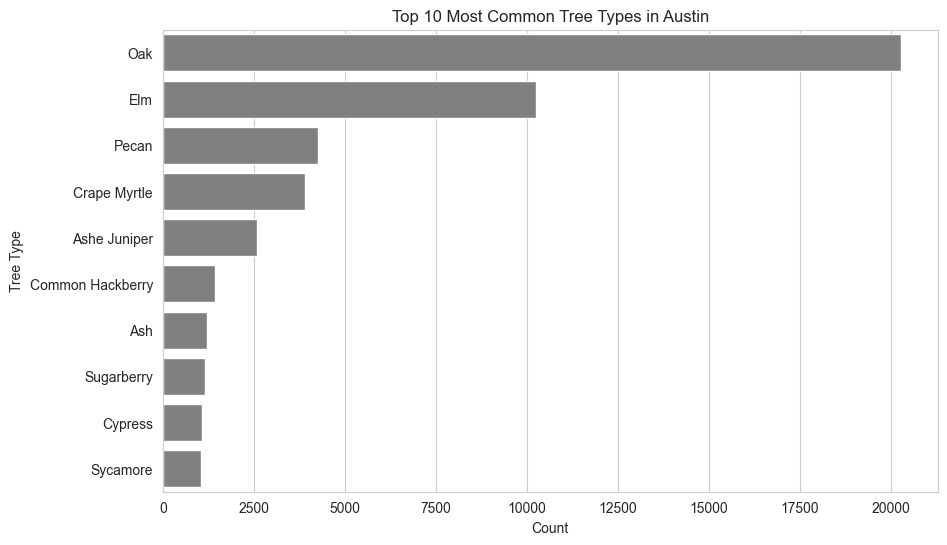

In [20]:
type_counts = tree_inv['TYPE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=[x.title() for x in type_counts.index], x=type_counts.values, color='gray')
plt.title('Top 10 Most Common Tree Types in Austin')
plt.xlabel('Count')
plt.ylabel('Tree Type')
plt.savefig('./plots/top_10_most_common_types.png', dpi=300, bbox_inches="tight")
plt.show()

In [21]:
type_counts

oak                 20279
elm                 10260
pecan                4254
crape myrtle         3920
ashe juniper         2575
common hackberry     1433
ash                  1227
sugarberry           1152
cypress              1065
sycamore             1037
Name: TYPE, dtype: int64

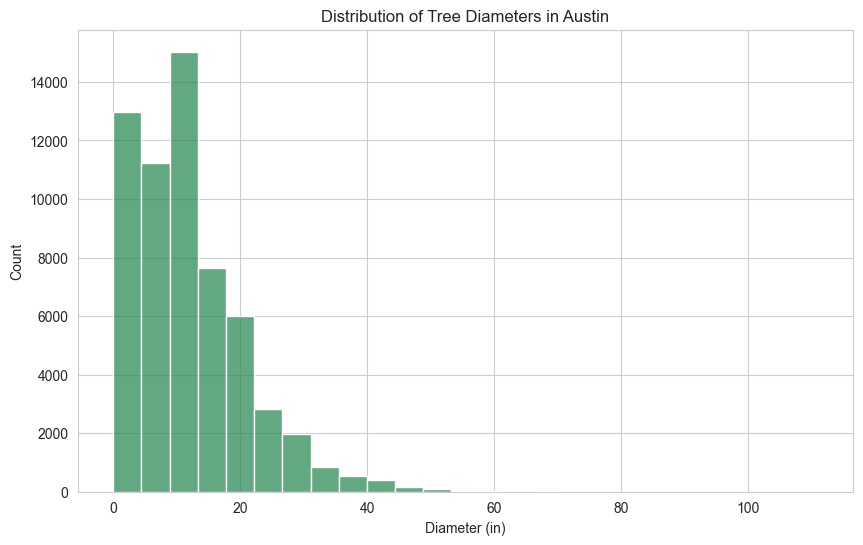

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(tree_inv['DIAMETER'], bins=25, color='#2E8B57')
plt.title('Distribution of Tree Diameters in Austin')
plt.xlabel('Diameter (in)')
plt.ylabel('Count')
plt.savefig('./plots/diameter_histogram.png', dpi=300, bbox_inches="tight")
plt.show()

In [23]:
top10 = tree_inv.loc[tree_inv['TYPE'].isin(type_counts.index)]
top10.head()

SPECIES  DIAMETER  LONGITUDE   LATITUDE          TYPE
0      live oak      20.0 -97.733989  30.252397           oak
1  ashe juniper       8.0 -97.779498  30.207045  ashe juniper
2      live oak      31.0 -97.734085  30.252389           oak
3      live oak      21.0 -97.733925  30.252385           oak
4      live oak      20.0 -97.733859  30.252314           oak

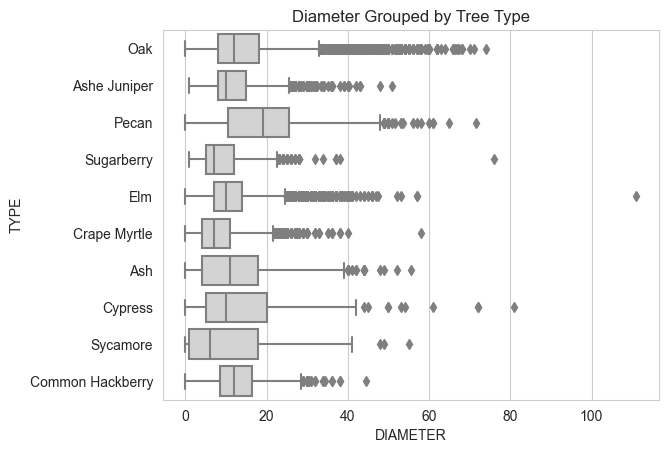

In [59]:
sns.boxplot(top10, x='DIAMETER', y=top10['TYPE'].apply(str.title), color='lightgray')
plt.title('Diameter Grouped by Tree Type')
plt.savefig('./plots/diameter_type_boxplot.png', dpi=300, bbox_inches="tight")
plt.show()

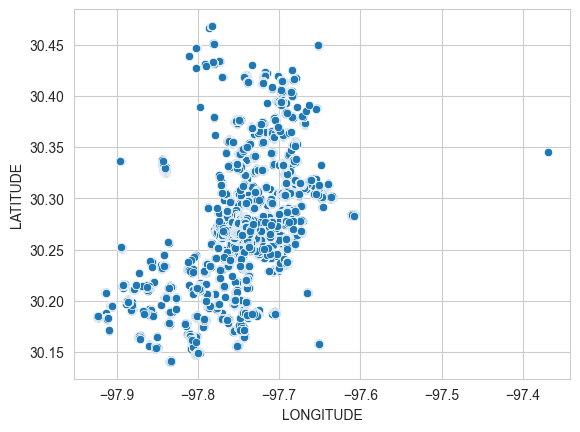

In [29]:
sns.scatterplot(tree_inv, x='LONGITUDE', y='LATITUDE')
plt.show()

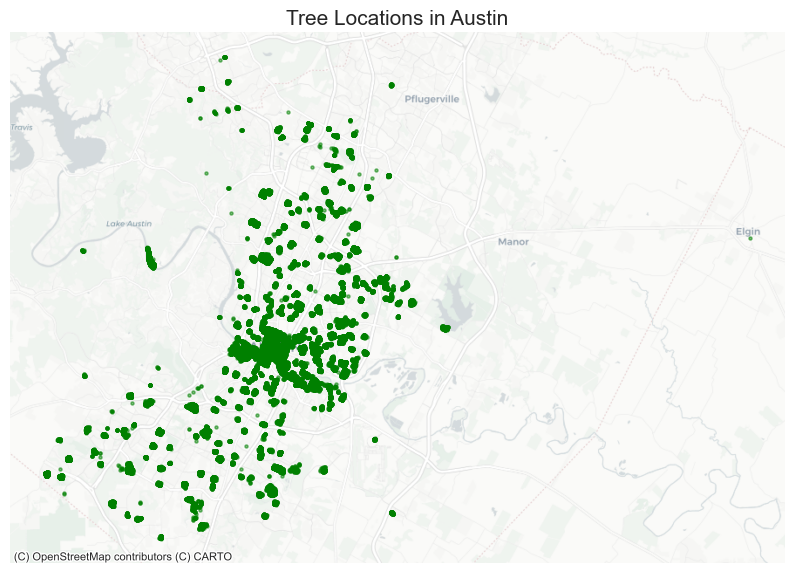

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Assuming tree_data already contains 'LATITUDE' and 'LONGITUDE' columns

# Convert the DataFrame to a GeoDataFrame
tree_inv['GEOMETRY'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='GEOMETRY')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='green', markersize=5, alpha=0.5)

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Set plot title and labels
ax.set_title("Tree Locations in Austin", fontsize=15)
plt.savefig('./plots/tree_map.png', dpi=300, bbox_inches="tight")
plt.show()

In [31]:
# is epsg:4326 required?
# how to zoom?
# draw austin bounds on the map
# color by species on the map
# remove labels and gridlines
# label all axes and title on all graphs

In [32]:
top5_types = tree_inv['TYPE'].value_counts().head(5)
tree_inv['types_top5'] = tree_inv[tree_inv['TYPE'].isin(top5_types.index)]['TYPE']
tree_inv.head()

SPECIES  DIAMETER  LONGITUDE   LATITUDE          TYPE  \
0      live oak      20.0 -97.733989  30.252397           oak   
1  ashe juniper       8.0 -97.779498  30.207045  ashe juniper   
2      live oak      31.0 -97.734085  30.252389           oak   
3      live oak      21.0 -97.733925  30.252385           oak   
4      live oak      20.0 -97.733859  30.252314           oak   

                                        GEOMETRY    types_top5  
0   POINT (-97.73398904092146 30.25239671647407)           oak  
1   POINT (-97.77949770772025 30.20704479399738)  ashe juniper  
2  POINT (-97.73408544155564 30.252389392695715)           oak  
3  POINT (-97.73392463841283 30.252384583450418)           oak  
4  POINT (-97.73385944263053 30.252313660255723)           oak

In [33]:
top5_types


oak             20279
elm             10260
pecan            4254
crape myrtle     3920
ashe juniper     2575
Name: TYPE, dtype: int64

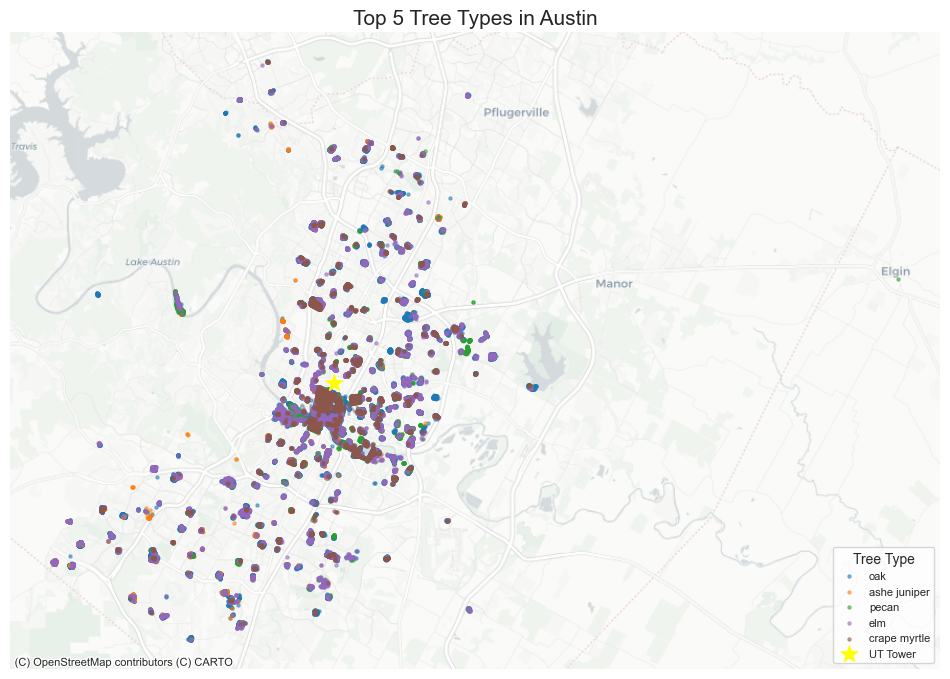

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Step 1: Find the top 5 most common species
top_5_species = gdf['TYPE'].value_counts().nlargest(5).index

# Step 2: Group all other species as 'Other'
gdf['SPECIES_GROUPED'] = gdf['TYPE'].apply(lambda species: species if species in top_5_species else 'Other')

# Step 3: Assign a color map for the top 5 species + 'Other'
species_list = gdf['SPECIES_GROUPED'].unique()  # Get unique species in the new column
color_map = {species: plt.cm.get_cmap('tab10')(i) for i, species in enumerate(species_list)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

for species, color in color_map.items():
    if species == 'Other':
        continue
    
    subset = gdf[gdf['SPECIES_GROUPED'] == species]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=species, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Add a basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower right', title="Tree Type", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Top 5 Tree Types in Austin", fontsize=15)

plt.savefig('./plots/tree_map_top_5_types.png', dpi=300, bbox_inches="tight")
plt.show()


In [35]:
dir(ctx.providers)

['AzureMaps',
 'BaseMapDE',
 'BasemapAT',
 'CartoDB',
 'CyclOSM',
 'Esri',
 'FreeMapSK',
 'Gaode',
 'GeoportailFrance',
 'HERE',
 'HEREv3',
 'HikeBike',
 'Jawg',
 'JusticeMap',
 'MapBox',
 'MapTiler',
 'MapTilesAPI',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OPNVKarte',
 'OneMapSG',
 'OpenAIP',
 'OpenFireMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenSnowMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'OrdnanceSurvey',
 'SafeCast',
 'Stadia',
 'Strava',
 'SwissFederalGeoportal',
 'Thunderforest',
 'TomTom',
 'TopPlusOpen',
 'USGS',
 'WaymarkedTrails',
 'nlmaps']

In [36]:
# Function to print all available maps for a specific provider
def print_provider_maps(provider):
    print(f"Maps available in this provider:")
    for map_name in dir(provider):
        if not map_name.startswith("_"):  # Skip private attributes
            print(f"- {map_name}")

print_provider_maps(ctx.providers.OpenStreetMap)

Maps available in this provider:
- BZH
- BlackAndWhite
- CH
- DE
- France
- HOT
- Mapnik


In [37]:
gdf['SPECIES_GROUPED'].value_counts()

oak             20279
Other           18522
elm             10260
pecan            4254
crape myrtle     3920
ashe juniper     2575
Name: SPECIES_GROUPED, dtype: int64

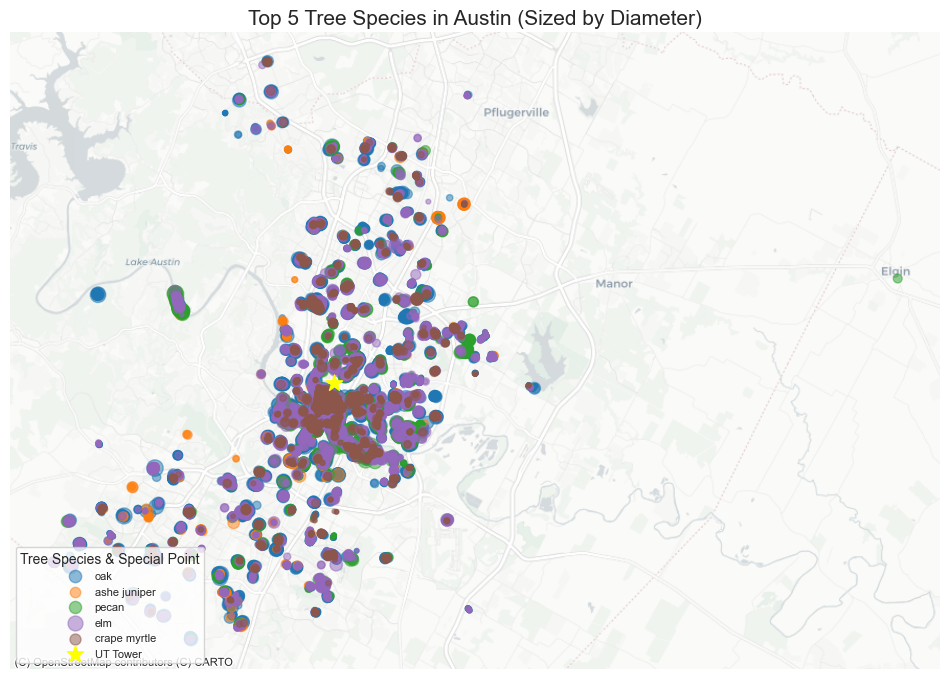

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', 'SPECIES', and 'DIAMETER'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', 'SPECIES', and 'DIAMETER'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Step 1: Find the top 5 most common species
top_5_species = gdf['TYPE'].value_counts().nlargest(5).index

# Step 2: Group all other species as 'Other'
gdf['SPECIES_GROUPED'] = gdf['TYPE'].apply(lambda species: species if species in top_5_species else 'Other')

# Step 3: Assign a color map for the top 5 species + 'Other'
species_list = gdf['SPECIES_GROUPED'].unique()  # Get unique species in the new column
color_map = {species: plt.cm.get_cmap('tab10')(i) for i, species in enumerate(species_list)}  # Assign colors

# Step 4: Plot each species with different color and size by 'DIAMETER'
fig, ax = plt.subplots(figsize=(12, 12))

for species, color in color_map.items():
    if species == 'Other':
        continue
    
    subset = gdf[gdf['SPECIES_GROUPED'] == species]  # Subset of the data for each species

    # Normalize the diameter for plotting (for better sizing)
    sizes = subset['DIAMETER'].apply(lambda x: max(10, x * 2))  # Adjust the factor for better visibility

    subset.plot(ax=ax, marker='o', color=color, markersize=sizes, label=species, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species and the special point
plt.legend(loc='lower left', title="Tree Species & Special Point", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Top 5 Tree Species in Austin (Sized by Diameter)", fontsize=15)

plt.show()

In [39]:
tree_inv['SPECIES'].apply(str.lower).unique()

array(['live oak', 'ashe juniper', 'pecan', 'bur oak',
       'texas mountain laurel', 'sugarberry', 'false willow', 'brush',
       'cedar elm', 'mexican plum', 'vitex', 'chinkapin oak', 'redbud',
       'mesquite', 'ligustrum', 'chinaberry', 'crape myrtle',
       'arizona ash', 'goldenrain tree', 'baldcypress', 'huisache',
       'mexican white oak', 'texas persimmon', 'chinese pistache',
       'chitalpa', 'texas ash', 'bradford pear', 'yaupon holly',
       'monterrey oak', 'juniper spp.', 'shumard oak', 'mulberry spp.',
       'bumelia', 'sycamore spp.', 'arizona cypress', 'lacebark elm',
       'american elm', 'catalpa', 'soapberry', 'pine spp.',
       'american sycamore', 'ash spp.', 'silk tree', 'arborvitae',
       'chinese tallow', 'palo verde', 'boxelder', 'red maple',
       'cottonwood', 'desert willow', 'ailanthus', 'bigtooth maple',
       'mexican sycamore', 'black willow', 'glossy privet',
       'honey locust', 'anaqua', 'green ash', 'waxleaf ligustrum',
       'loq

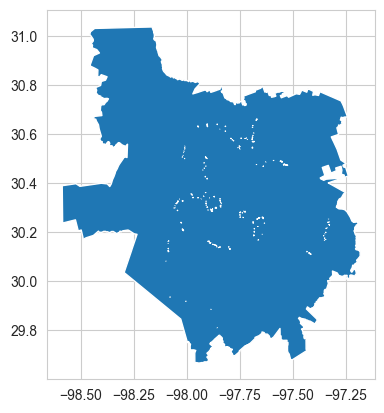

In [40]:
gdf_austin_zip_codes = gpd.read_file('./geo stuff/city-of-austin-texas-zipcodes.shp')

gdf_austin_boundary = gdf_austin_zip_codes.dissolve()
gdf_austin_boundary.plot()
plt.show()

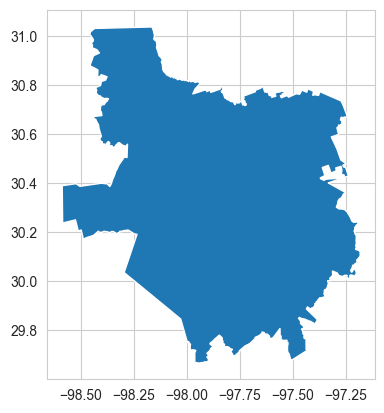

In [41]:
from shapely.geometry import Polygon, MultiPolygon


def remove_holes(geometry):
    if geometry.geom_type == 'Polygon':
        return Polygon(geometry.exterior)  # Keep only the exterior
    elif geometry.geom_type == 'MultiPolygon':
        # For multipolygons, apply the same process to each individual polygon
        return MultiPolygon([Polygon(p.exterior) for p in geometry])
    else:
        return geometry  # In case it's a different geometry type, return as-is

gdf_austin_boundary['geometry'] = gdf_austin_boundary['geometry'].apply(remove_holes)

gdf_austin_boundary.plot()
gdf_austin_boundary.to_file('./geo stuff/austin_tx_boundary.shp')
plt.show()

In [42]:
austin_boundary = gpd.read_file('./geo stuff/austin_tx_boundary.shp')
austin_boundary = austin_boundary.to_crs(epsg=3857)

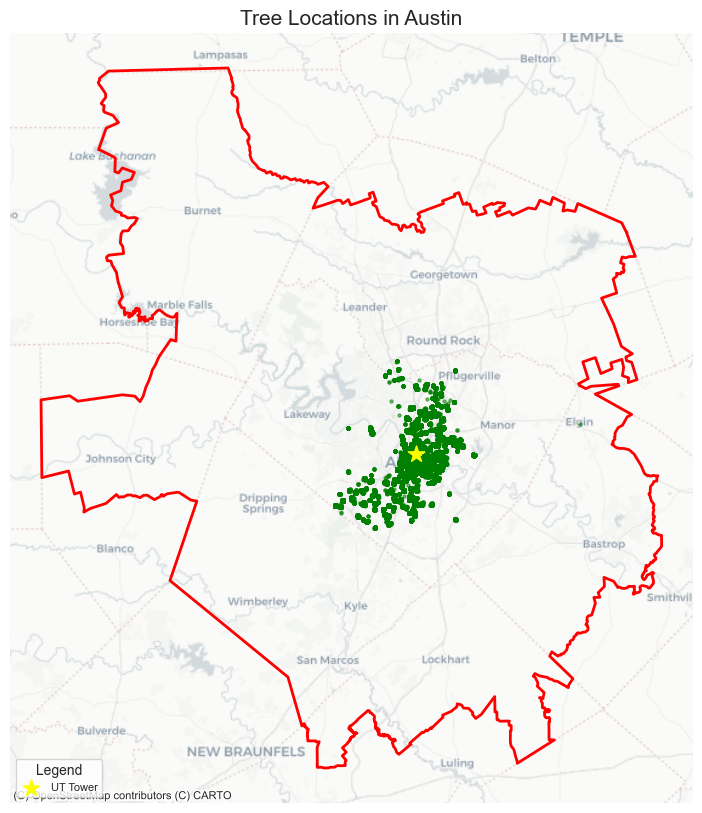

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Assuming tree_data already contains 'LATITUDE' and 'LONGITUDE' columns

# Convert the DataFrame to a GeoDataFrame
tree_inv['GEOMETRY'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='GEOMETRY')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='green', markersize=5, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Plot the Austin boundary
austin_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species and the special point
plt.legend(loc='lower left', title="Legend", fontsize=8, title_fontsize=10)

# Set plot title and labels
ax.set_title("Tree Locations in Austin", fontsize=15)
plt.show()

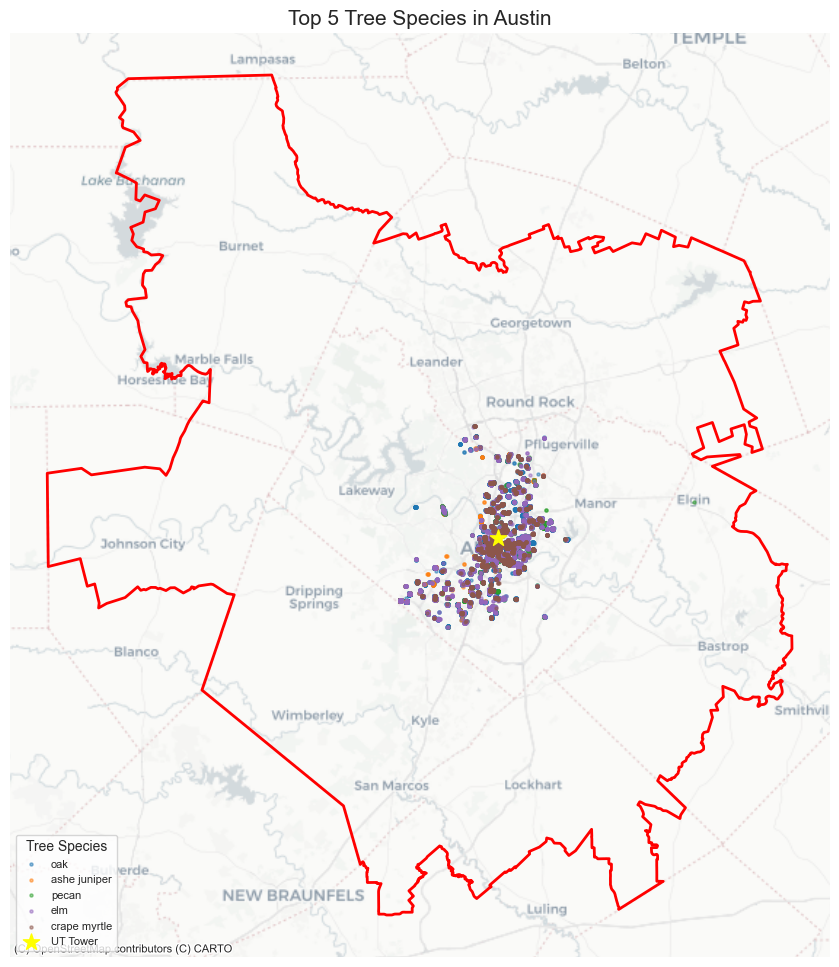

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Step 1: Find the top 5 most common species
top_5_species = gdf['TYPE'].value_counts().nlargest(5).index

# Step 2: Group all other species as 'Other'
gdf['SPECIES_GROUPED'] = gdf['TYPE'].apply(lambda species: species if species in top_5_species else 'Other')

# Step 3: Assign a color map for the top 5 species + 'Other'
species_list = gdf['SPECIES_GROUPED'].unique()  # Get unique species in the new column
color_map = {species: plt.cm.get_cmap('tab10')(i) for i, species in enumerate(species_list)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

for species, color in color_map.items():
    if species == 'Other':
        continue

    subset = gdf[gdf['SPECIES_GROUPED'] == species]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=species, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Plot the Austin boundary
austin_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower left', title="Tree Species", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Top 5 Tree Species in Austin", fontsize=15)

plt.show()


In [45]:
austin_boundary

name  number_of  objectid zipcode  zipcodes_i  \
0  MANOR        2.0      29.0   78653        23.0   

                                            geometry  
0  POLYGON ((-10893082.005 3475171.512, -10893380...

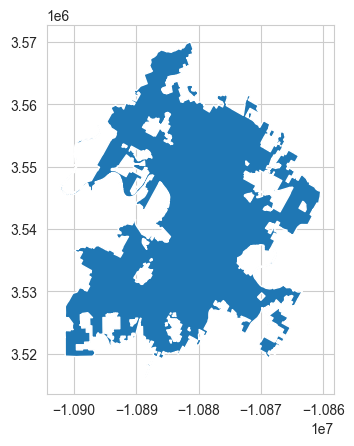

In [46]:
gdf_tx_cities = gpd.read_file('./geo stuff/Cities.shp')
gdf_austin = gdf_tx_cities[gdf_tx_cities['CITY_NM'] == 'Austin']

# gdf_austin_boundary = gdf_austin_zip_codes.dissolve()
gdf_austin.plot()
plt.show()

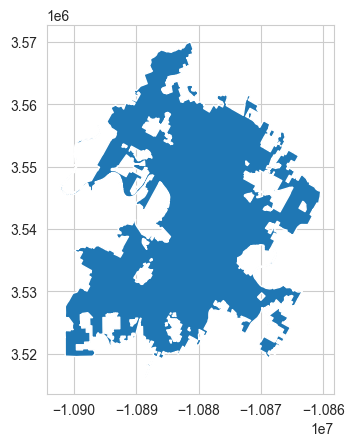

In [47]:
simplified_boundary = gdf_austin.simplify(tolerance=0.00001)
simplified_boundary.plot()
plt.show()

In [48]:
# from shapely.geometry import Polygon, MultiPolygon
# 
# 
# def remove_holes(geometry):
#     if geometry.geom_type == 'Polygon':
#         return Polygon(geometry.exterior)  # Keep only the exterior
#     elif geometry.geom_type == 'MultiPolygon':
#         # For multipolygons, apply the same process to each individual polygon
#         return MultiPolygon([Polygon(p.exterior) for p in geometry])
#     else:
#         return geometry  # In case it's a different geometry type, return as-is
# 
# gdf_austin_boundary['geometry'] = gdf_austin_boundary['geometry'].apply(remove_holes)
# 
# gdf_austin_boundary.plot()
# gdf_austin_boundary.to_file('./geo stuff/austin_tx_boundary.shp')
# plt.show()

In [49]:
# austin_boundary = gpd.read_file('./geo stuff/austin_tx_boundary.shp')
# austin_boundary = austin_boundary.to_crs(epsg=3857)

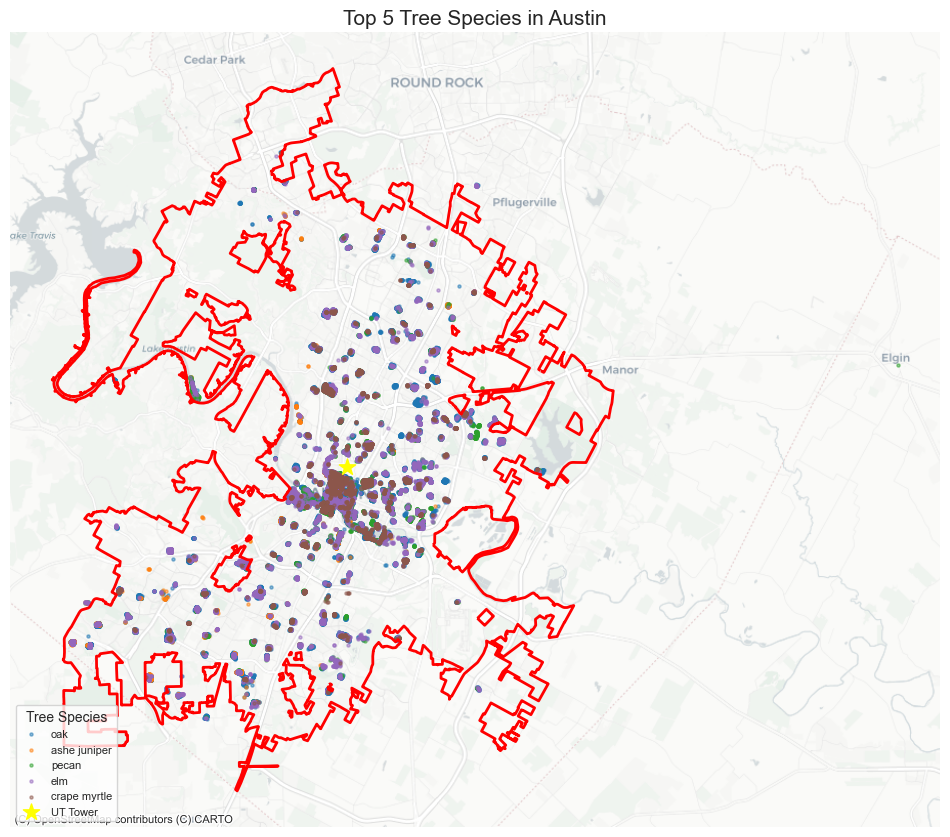

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Step 1: Find the top 5 most common species
top_5_species = gdf['TYPE'].value_counts().nlargest(5).index

# Step 2: Group all other species as 'Other'
gdf['SPECIES_GROUPED'] = gdf['TYPE'].apply(lambda species: species if species in top_5_species else 'Other')

# Step 3: Assign a color map for the top 5 species + 'Other'
species_list = gdf['SPECIES_GROUPED'].unique()  # Get unique species in the new column
color_map = {species: plt.cm.get_cmap('tab10')(i) for i, species in enumerate(species_list)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

for species, color in color_map.items():
    if species == 'Other':
        continue

    subset = gdf[gdf['SPECIES_GROUPED'] == species]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=species, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Plot the Austin boundary
gdf_austin.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower left', title="Tree Species", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Top 5 Tree Species in Austin", fontsize=15)

plt.show()


In [51]:
convex_hull = gdf_austin.unary_union.convex_hull

# Convert the convex hull to a GeoDataFrame for plotting or further use
convex_hull_gdf = gpd.GeoDataFrame(geometry=[convex_hull])

C:\Users\Victor Nguyen\AppData\Local\Temp\ipykernel_20292\2666842258.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex_hull = gdf_austin.unary_union.convex_hull


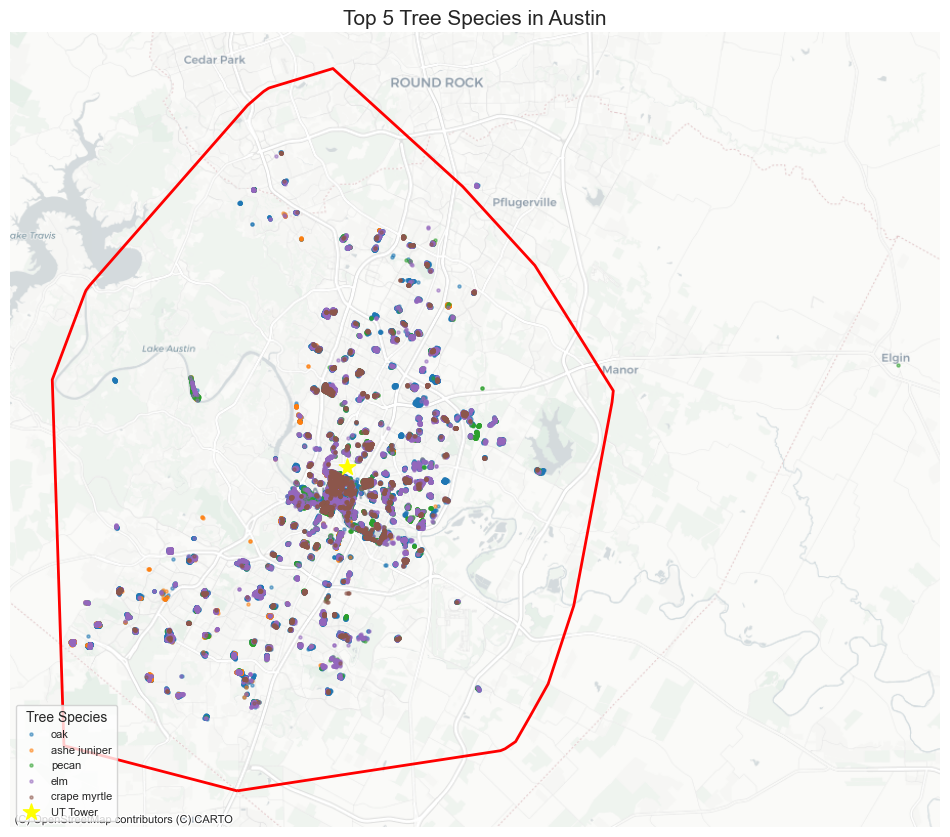

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

# Step 1: Find the top 5 most common species
top_5_species = gdf['TYPE'].value_counts().nlargest(5).index

# Step 2: Group all other species as 'Other'
gdf['SPECIES_GROUPED'] = gdf['TYPE'].apply(lambda species: species if species in top_5_species else 'Other')

# Step 3: Assign a color map for the top 5 species + 'Other'
species_list = gdf['SPECIES_GROUPED'].unique()  # Get unique species in the new column
color_map = {species: plt.cm.get_cmap('tab10')(i) for i, species in enumerate(species_list)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

for species, color in color_map.items():
    if species == 'Other':
        continue

    subset = gdf[gdf['SPECIES_GROUPED'] == species]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=species, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Plot the Austin boundary
convex_hull_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Add a basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower left', title="Tree Species", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Top 5 Tree Species in Austin", fontsize=15)

plt.show()


In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

coords = tree_inv[['LONGITUDE', 'LATITUDE']]

scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

db = DBSCAN(eps=0.1, min_samples=1000).fit(coords_scaled)
db2 = DBSCAN(eps=0.125, min_samples=1000).fit(coords_scaled)
# tree_inv['CLUSTER'] = db.labels_

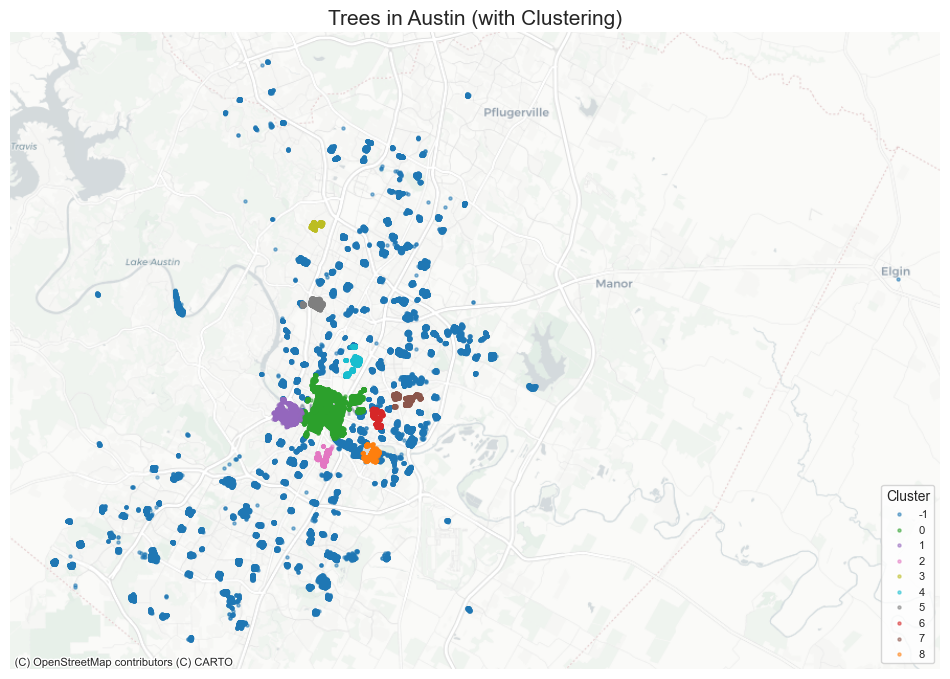

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

gdf['CLUSTER'] = db.labels_

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

clusters = gdf['CLUSTER'].unique()

# Step 3: Assign a color map
color_map = {cluster: plt.cm.get_cmap('tab10')(i) for i, cluster in enumerate(clusters)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

# for cluster, color in color_map.items():
for cluster in sorted(clusters):
    color = color_map[cluster]
    subset = gdf[gdf['CLUSTER'] == cluster]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=cluster, alpha=0.5)

# ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
# ut_tower = ut_tower.to_crs(epsg=3857)
# ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Add a basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower right', title="Cluster", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Trees in Austin (with Clustering)", fontsize=15)

plt.savefig('./plots/tree_map_dbscsan.png', dpi=300, bbox_inches="tight")
plt.show()


In [55]:
# 0 (green) is bunch of diff parks: butler metro park, duncan neighborhood park, pease district park, waterloo park, etc.
# 1 (purple) is zilker metropolitan park
# 2 (pink) is trees on the side of s congress ave
# 3 (gold) is anderson high school baseball field
# 4 (teal) is near hancock recreation center
# 5 (gray) is perry neighborhood park
# 6 (red) is boggy creek greenbelt and rosewood neighborhood park
# 7 (brown) is givens district park, oak springs school park, and evergreen cemetery
# 8 (orange) is lakeshore at lady bird lake
# -1 is trees that weren't assigned to a cluster

In [56]:
gdf[gdf['CLUSTER'] == 7]

SPECIES  DIAMETER  LONGITUDE   LATITUDE        TYPE  \
1050      arizona ash      26.0 -97.700116  30.272389         ash   
1053        cedar elm      18.0 -97.700121  30.272519         elm   
1054      shumard oak       4.0 -97.699606  30.272597         oak   
1057    mulberry spp.      19.0 -97.699547  30.272620    mulberry   
1058        cedar elm      15.0 -97.699510  30.272628         elm   
...               ...       ...        ...        ...         ...   
45967      elm, cedar      14.0 -97.683038  30.277724         elm   
45968       oak, post      18.0 -97.683022  30.277705         oak   
45969       oak, post      14.5 -97.683009  30.277737         oak   
53967      elm, cedar      12.0 -97.689017  30.276336         elm   
53968  chinaberrytree       5.5 -97.688582  30.276814  chinaberry   

                                            GEOMETRY types_top5  \
1050   POINT (-97.70011600046547 30.272388999707804)        NaN   
1053      POINT (-97.7001209999738 30.2725190001919)        elm   
1054    POINT (-97.6996060004588 30.272596999627623)        oak   
1057   POINT (-97.69954700046975 30.272619999683627)        NaN   
1058   POINT (-97.69951000010708 30.272628000072363)        elm   
...                                              ...        ...   
45967   POINT (-97.6830376194634 30.277723880039076)        elm   
45968  POINT (-97.68302152592007 30.277705349429993)        oak   
45969   POINT (-97.68300945642615 30.27773719921699)        oak   
53967   POINT (-97.6890165020041 30.276335522185807)        elm   
53968   POINT (-97.6885820553386 30.276814254148924)        NaN   

                                geometry  CLUSTER  
1050   POINT (-10875927.164 3538611.182)        7  
1053    POINT (-10875927.72 3538627.938)        7  
1054   POINT (-10875870.391 3538637.992)        7  
1057   POINT (-10875863.823 3538640.957)        7  
1058   POINT (-10875859.704 3538641.988)        7  
...                                  ...      ...  
45967  POINT (-10874026.007 3539298.845)        7  
45968  POINT (-10874024.215 3539296.456)        7  
45969  POINT (-10874022.872 3539300.561)        7  
53967  POINT (-10874691.573 3539119.882)        7  
53968  POINT (-10874643.211 3539181.592)        7  

[2517 rows x 9 columns]

In [57]:
gdf['CLUSTER'].value_counts()

-1    35071
 0    10658
 5     2607
 7     2517
 1     2297
 4     1925
 2     1471
 3     1179
 6     1065
 8     1020
Name: CLUSTER, dtype: int64

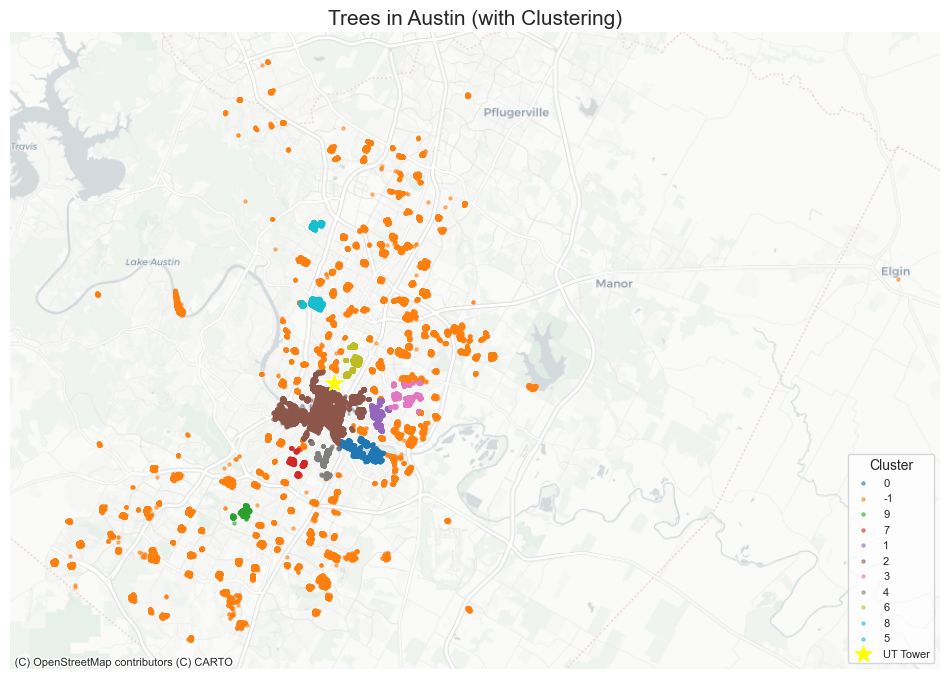

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

# Sample data with 'LATITUDE', 'LONGITUDE', and 'SPECIES'
# Assuming tree_data already has 'LATITUDE', 'LONGITUDE', and 'SPECIES'

# Convert the DataFrame to a GeoDataFrame
tree_inv['geometry'] = tree_inv.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(tree_inv, geometry='geometry')

gdf['CLUSTER'] = db2.labels_

# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) for plotting with tiles
gdf = gdf.to_crs(epsg=3857)

clusters = gdf['CLUSTER'].unique()

# Step 3: Assign a color map
color_map = {cluster: plt.cm.get_cmap('tab10')(i) for i, cluster in enumerate(clusters)}  # Assign colors

# Step 4: Plot each species with a different color
fig, ax = plt.subplots(figsize=(12, 12))

for cluster, color in color_map.items():
    subset = gdf[gdf['CLUSTER'] == cluster]  # Subset of the data for each species
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=cluster, alpha=0.5)

ut_tower = gpd.GeoDataFrame(geometry=[Point(-97.7394, 30.2862)], crs="EPSG:4326")
ut_tower = ut_tower.to_crs(epsg=3857)
ut_tower.plot(ax=ax, marker='*', markersize=150, color='yellow', label='UT Tower')

# Add a basemap (OpenStreetMap)
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
# ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

# Remove axis markers (ticks and labels)
ax.set_axis_off()

# Remove gridlines
ax.grid(False)

# Add a legend for species
plt.legend(loc='lower right', title="Cluster", fontsize=8, title_fontsize=10)

# Set title
ax.set_title("Trees in Austin (with Clustering)", fontsize=15)

plt.show()
